In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


!ls /content/drive/My\ Drive/Colab_Notebooks/data

Mounted at /content/drive
agnostic_bert_article_embeddings.pkl   cleaned_10k_with_first100.csv
agnostic_bert_first100_embeddings.pkl  cleaned_15k.csv
agnostic_bert_title_embeddings10k.pkl  cleaned_30k.csv
agnostic_bert_title_embeddings.pkl     cleaned_full.csv
all-the-news-2-1.csv		       dbscan_Agnostic_clusters_analysis.csv
bert_article_embeddings10K.pkl	       full_clusterd.pkl
bert_article_embeddings.pkl	       full_clustered.pkl
bert_first100_embeddings.pkl	       full_embedding_15K.pkl
bert_title_embeddings10K.pkl	       last_rows_300000.csv
cleaned_100k.csv		       last_rows_680004.csv
cleaned_10k.csv


In [ ]:
import unicodedata  # לניקוי תווים לא ברורים
import numpy as np

chunk_size = 10000

# קריאת הקובץ במנות
print("Reading file in chunks...")
file_path = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/data/last_rows_300000.csv", chunksize=chunk_size)

output_full = "/content/drive/My Drive/Colab_Notebooks/data/cleaned_full.csv"
output_15k = "/content/drive/My Drive/Colab_Notebooks/data/cleaned_15k.csv"
output_30k = "/content/drive/My Drive/Colab_Notebooks/data/cleaned_30k.csv"
cleaned_rows = []


print("Reading and cleaning 300,000 raws in 10,000 chunks")
for chunk in file_path:
  clean_chunk = chunk.dropna(subset=['author','article','section']) #ניקוי פרסומות
  clean_chunk.loc[:,'title'] = clean_chunk['title'].apply(lambda x: unicodedata.normalize("NFKD", str(x)))#ניקוי טקסט
  clean_chunk.loc[:,'section'] = clean_chunk['section'].apply(lambda x: unicodedata.normalize("NFKD", str(x)))
  cleaned_rows.append(clean_chunk)


#חיבור צאנקים
print("combining clean data chunks")
full_cleaned = pd.concat(cleaned_rows,ignore_index=True)
full_cleaned = full_cleaned.drop('date',axis=1)
full_cleaned = full_cleaned.drop('section',axis=1)


# פונקציה שמחזירה את 100 המילים הראשונות מכל כתבה
def get_first_100_words(text):
    words = text.split()[:100]  # לוקחים רק את 100 המילים הראשונות
    return " ".join(words)  # מחזירים כטקסט מחובר

# יצירת עמודה חדשה עם 100 המילים הראשונות
full_cleaned['F100'] = full_cleaned['article'].apply(get_first_100_words)
full_cleaned['F100'] = full_cleaned['F100'].replace("", np.nan)  # הופכים "" ל-NaN
full_cleaned = full_cleaned.dropna(subset=['F100'], axis=0)  # מוחקים את כל השורות עם NaN


full_cleaned.to_csv(output_full, index=False)
print(f"size of full cleaned : {full_cleaned.shape}")


data_30k_cleaned = full_cleaned.head(30000)
data_30k_cleaned.to_csv(output_30k, index=False)


data_15k_cleaned = full_cleaned.head(15000)
data_15k_cleaned.to_csv(output_15k, index=False)


print("cleand complete")


Reading file in chunks...
Reading and cleaning 300,000 raws in 10,000 chunks
combining clean data chunks
size of full cleaned : (75601, 11)
cleand complete


another 15K

In [ ]:


# Create a new dataframe excluding the first 15000 rows
data_15k_excluded = full_cleaned.iloc[15000:]

# Define output file path for the new dataframe
output_15k_excluded = "/content/drive/My Drive/Colab_Notebooks/data/cleaned_excluded_15k.csv"

# Save the new dataframe to a CSV file
data_15k_excluded.to_csv(output_15k_excluded, index=False)

print(f"Excluded 15k data saved to: {output_15k_excluded}")
print(f"Size of excluded data: {data_15k_excluded.shape}")


🔍 General Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  15000 non-null  int64  
 1   Unnamed: 0    15000 non-null  int64  
 2   year          15000 non-null  int64  
 3   month         15000 non-null  float64
 4   day           15000 non-null  int64  
 5   author        15000 non-null  object 
 6   title         15000 non-null  object 
 7   article       15000 non-null  object 
 8   url           15000 non-null  object 
 9   publication   15000 non-null  object 
 10  F100          15000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.3+ MB
None


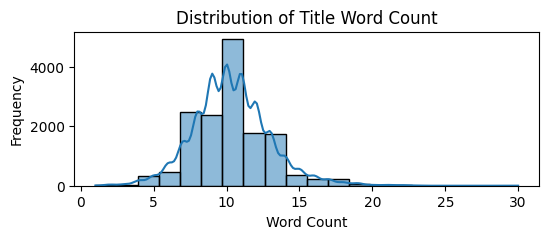

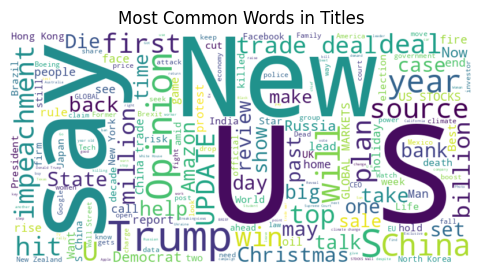

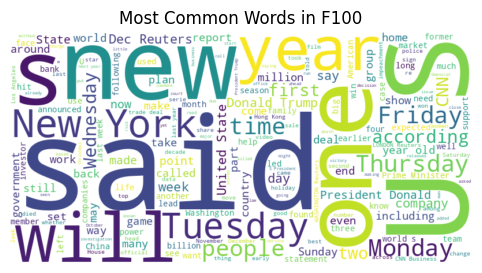

In [ ]:
##EDA


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

file_path = "/content/drive/My Drive/Colab_Notebooks/data/cleaned_15k.csv"
df = pd.read_csv(file_path)

print("🔍 General Info:")
print(df.info())

df['words_in_title'] = df['title'].apply(lambda x: len(str(x).split()))
df['words_in_F100'] = df['F100'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6, 2))
sns.histplot(df['words_in_title'], bins=20, kde=True)
plt.title('Distribution of Title Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 3️⃣ יצירת WordCloud לכותרות ולגוף הכתבה
title_text = " ".join(df['title'].dropna())
F100_text = " ".join(df['F100'].dropna())

plt.figure(figsize=(8,3))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Titles")
plt.show()

plt.figure(figsize=(8,3))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(F100_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in F100")
plt.show()


NameError: name 'full_cleaned' is not defined